### Matching ECO to FEN

In [1]:
import chess
import chess.engine
import pandas as pd
from stockfish import Stockfish

In [2]:
eco = pd.read_excel('ECO_openings.xlsx')
eco.head()

,ECO,FEN,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,A00,rnbqkbnr/pppppppp/8/8/1P6/8/P1PPPPPP/RNBQKBNR ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A01,rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A04,rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A15,rnbqkb1r/pppppppp/5n2/8/2P5/8/PP1PPPPP/RNBQKBN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A16,rnbqkb1r/pppppppp/5n2/8/2P5/2N5/PP1PPPPP/R1BQK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Example. Generating a single game starting with Sicilian Najdorf

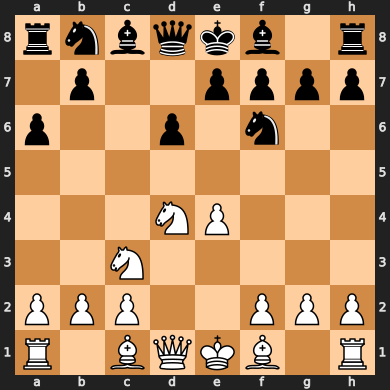

In [3]:
board = chess.Board()
board.set_fen(eco['FEN'][25]) # the index of Sicilian Najdorf
board

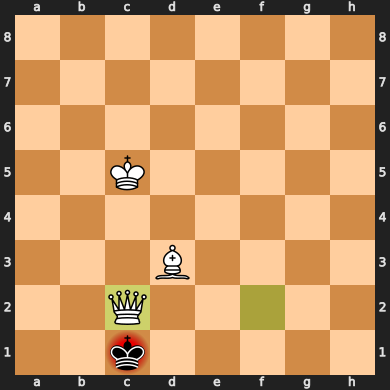

In [4]:
engine = chess.engine.SimpleEngine.popen_uci(r'E:\anaconda3\Lib\site-packages\stockfish\stockfish_13_win_x64.exe')

gamelog = []

while not board.is_game_over():
    result = engine.play(board, chess.engine.Limit(time=0.1))
    gamelog.append(result.move)
    board.push(result.move)

engine.quit()

board

In [5]:
gamelog

[Move.from_uci('f1e2'),
 Move.from_uci('e7e5'),
 Move.from_uci('d4b3'),
 Move.from_uci('f8e7'),
 Move.from_uci('c1g5'),
 Move.from_uci('e8g8'),
 Move.from_uci('d1d3'),
 Move.from_uci('c8e6'),
 Move.from_uci('g5f6'),
 Move.from_uci('e7f6'),
 Move.from_uci('e1c1'),
 Move.from_uci('f6e7'),
 Move.from_uci('g2g3'),
 Move.from_uci('b8c6'),
 Move.from_uci('f2f4'),
 Move.from_uci('f7f5'),
 Move.from_uci('e2f3'),
 Move.from_uci('g8h8'),
 Move.from_uci('h1f1'),
 Move.from_uci('a8c8'),
 Move.from_uci('a2a3'),
 Move.from_uci('e5f4'),
 Move.from_uci('g3f4'),
 Move.from_uci('c6a5'),
 Move.from_uci('b3a5'),
 Move.from_uci('d8a5'),
 Move.from_uci('c3d5'),
 Move.from_uci('e6d5'),
 Move.from_uci('d3d5'),
 Move.from_uci('a5d5'),
 Move.from_uci('d1d5'),
 Move.from_uci('f5e4'),
 Move.from_uci('f3e4'),
 Move.from_uci('c8c4'),
 Move.from_uci('f1e1'),
 Move.from_uci('f8f4'),
 Move.from_uci('e4f5'),
 Move.from_uci('c4c7'),
 Move.from_uci('d5d6'),
 Move.from_uci('g7g6'),
 Move.from_uci('d6d7'),
 Move.from_uci('

In [6]:
board.result()

'1-0'

### Simulating 10 games per each opening

In [7]:
for i in range(len(eco)):
    for j in range(10):
        board = chess.Board()
        board.set_fen(eco['FEN'][i])
        engine = chess.engine.SimpleEngine.popen_uci(r'E:\anaconda3\Lib\site-packages\stockfish\stockfish_13_win_x64.exe')
        while not board.is_game_over():
            result = engine.play(board, chess.engine.Limit(time=0.1))
            board.push(result.move)
        engine.quit()
        eco.iloc[i,j+2] = board.result()

In [8]:
eco

,ECO,FEN,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,A00,rnbqkbnr/pppppppp/8/8/1P6/8/P1PPPPPP/RNBQKBNR ...,1/2-1/2,1/2-1/2,0-1,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2
1,A01,rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR ...,0-1,1/2-1/2,0-1,1/2-1/2,1/2-1/2,1/2-1/2,0-1,1/2-1/2,1/2-1/2,1/2-1/2
2,A04,rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR ...,0-1,0-1,1/2-1/2,1/2-1/2,1-0,1/2-1/2,1/2-1/2,0-1,1/2-1/2,1/2-1/2
3,A15,rnbqkb1r/pppppppp/5n2/8/2P5/8/PP1PPPPP/RNBQKBN...,1/2-1/2,1/2-1/2,1/2-1/2,1-0,1/2-1/2,1-0,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2
4,A16,rnbqkb1r/pppppppp/5n2/8/2P5/2N5/PP1PPPPP/R1BQK...,1/2-1/2,0-1,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1-0
5,A40,rnbqkbnr/pppp1ppp/8/4p3/3P4/8/PPP1PPPP/RNBQKBN...,1-0,1-0,1-0,1-0,1-0,1-0,1-0,0-1,1-0,1-0
6,A45,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,1/2-1/2,1/2-1/2,1-0,1/2-1/2,1/2-1/2,1/2-1/2,1-0,1-0,1/2-1/2,1/2-1/2
7,A46,rnbqkb1r/pppppppp/5n2/8/3P4/5N2/PPP1PPPP/RNBQK...,1/2-1/2,0-1,1/2-1/2,1-0,1/2-1/2,1/2-1/2,1/2-1/2,1/2-1/2,1-0,1/2-1/2
8,A80,rnbqkbnr/ppppp1pp/8/5p2/3P4/8/PPP1PPPP/RNBQKBN...,1-0,1/2-1/2,1/2-1/2,1/2-1/2,0-1,1/2-1/2,1/2-1/2,0-1,1/2-1/2,1-0
9,B00,rnbqkbnr/ppppp1pp/5p2/8/4P3/8/PPPP1PPP/RNBQKBN...,1-0,1-0,0-1,1/2-1/2,1-0,1/2-1/2,1-0,1/2-1/2,1-0,1-0


In [10]:
eco.to_csv("Stockfish_Simulation.csv")